In [66]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

date_pattern = "2014/11"
img_pool = []
with open("./data/img_attr.csv", 'r') as fin:
    for line in fin:
        attrs = line.strip().split("\t")
        if len(attrs) != 7:
            continue
        imgid = attrs[0]
        show = float(attrs[3])
        #hotness = attrs[4]
        datestamp = attrs[5]
        if datestamp.startswith(date_pattern):
            img_pool.append((int(imgid), int(show)))


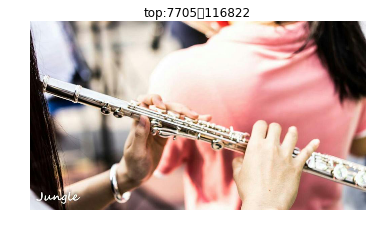

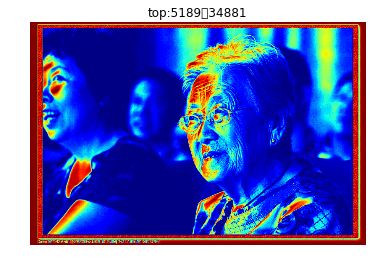

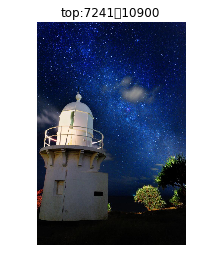

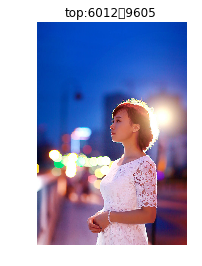

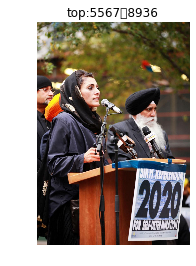

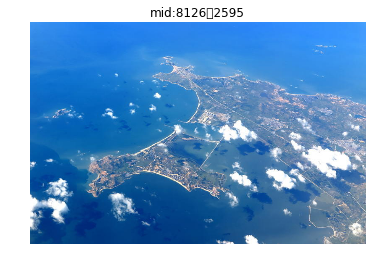

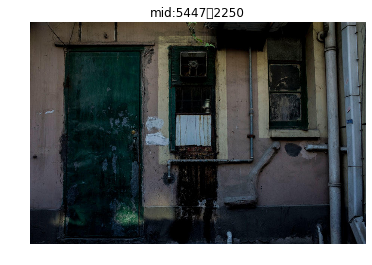

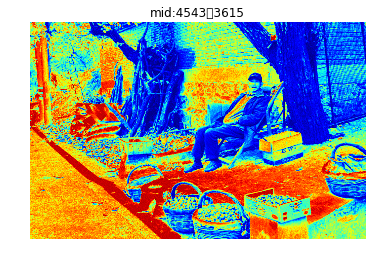

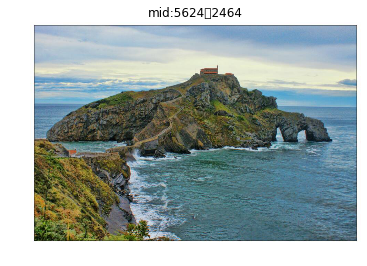

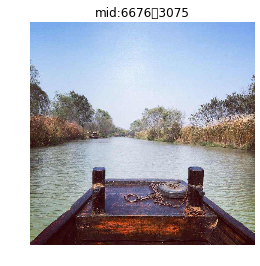

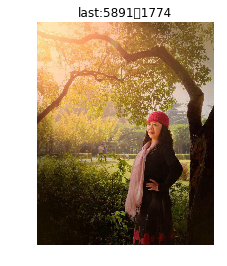

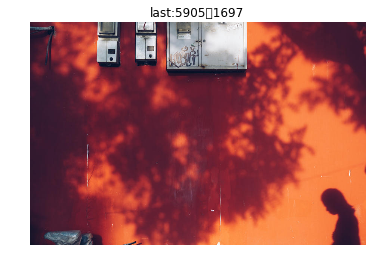

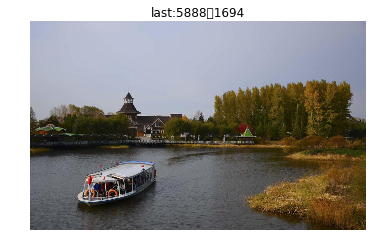

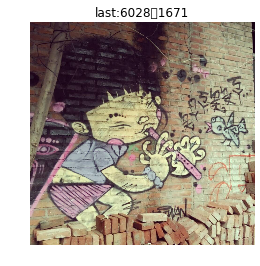

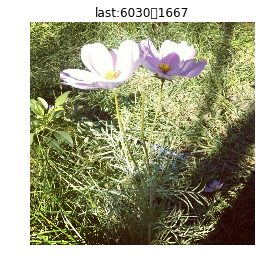

In [67]:
%matplotlib inline
def plot(imgid, title=""):
    if type(imgid) != str:
        imgid = str(imgid)
    img_file = "./data/img/%s.jpg"%imgid
    img = Image.open(img_file)
    plt.figure()
    plt.axis('off')
    plt.title(title)
    plt.imshow(img)
    plt.show()

img_matrix = np.array(img_pool)
max_show = img_matrix[:,1].max()
min_show = img_matrix[:,1].min()
normalized_score = (img_matrix[:,1]-min_show)*1.0/(max_show-min_show)

K = 5
sorted_idx = normalized_score.argsort()[::-1]
topK_idx = sorted_idx[:K]
mid_idx = np.random.permutation(sorted_idx)[:K]
lastK_idx = sorted_idx[-K:]

for imgid, show_num in img_matrix[topK_idx]:
    plot(imgid, title="top:"+str(imgid)+"\t"+str(show_num))
    
for imgid, show_num in img_matrix[mid_idx]:
    plot(imgid, title="mid:"+str(imgid)+"\t"+str(show_num))
    
for imgid, show_num in img_matrix[lastK_idx]:
    plot(imgid, title="last:"+str(imgid)+"\t"+str(show_num))